In [1]:
import torch

# 1. הדפסת גרסת PyTorch (כולל גרסת ה-CUDA שהותקנה איתה)
print(torch.__version__)

# 2. בדיקה האם CUDA (כרטיס המסך) זמין לשימוש
print(torch.cuda.is_available())

# 3. הדפסת שם כרטיס המסך המזוהה במיקום 0
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

# 4. יצירת טנזור והעברתו לכרטיס המסך (CUDA)
# זה מה שיוצר את הפלט: tensor([...], device='cuda:0')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor([1.0, 2.0, 3.0]).to(device)

print(x)

2.11.0.dev20260130+cu128
True
NVIDIA GeForce RTX 5070 Laptop GPU
tensor([1., 2., 3.], device='cuda:0')


In [6]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

print("--- בדיקת תקינות ספריות ---")

# בדיקת Numpy
a = np.array([1, 2, 3])
print(f"✅ Numpy v{np.__version__} עובד (חישוב מהיר: {a.sum()})")

# בדיקת Pandas
df = pd.DataFrame({'test': [10, 20]})
print(f"✅ Pandas v{pd.__version__} עובד (טעינת טבלה תקינה)")

# בדיקת Scipy
res = scipy.stats.describe([1, 2, 3, 4, 5])
print(f"✅ Scipy v{scipy.__version__} עובד (חישוב סטטיסטי תקין)")

# בדיקת Scikit-learn
model = LinearRegression()
print(f"✅ Scikit-learn v{sklearn.__version__} עובד (מודל מוכן לאימון)")

# בדיקת TQDM
print("✅ בדיקת TQDM: ", end="")
for i in tqdm(range(3), desc="סריקה"):
    time.sleep(0.1)

# בדיקת Matplotlib (יוצר גרף קטן בזיכרון)
plt.figure(figsize=(2,1))
plt.plot([1, 2], [1, 2])
plt.title("Matplotlib OK")
plt.close()
print("✅ Matplotlib עובד (יצירת גרפים תקינה)")

print("\n🚀 כל הספריות בסביבה 1 מוכנות לעבודה!")

--- בדיקת תקינות ספריות ---
✅ Numpy v2.4.1 עובד (חישוב מהיר: 6)
✅ Pandas v2.3.3 עובד (טעינת טבלה תקינה)
✅ Scipy v1.17.0 עובד (חישוב סטטיסטי תקין)
✅ Scikit-learn v1.8.0 עובד (מודל מוכן לאימון)
✅ בדיקת TQDM: 

סריקה: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

✅ Matplotlib עובד (יצירת גרפים תקינה)

🚀 כל הספריות בסביבה 1 מוכנות לעבודה!


In [7]:
import numpy as np

np.random.seed(42)  # לשחזור תוצאות

# -----------------------
# פרמטרים
# -----------------------
N = 100_000  # מספר דוגמאות גדול לסימולציה

# פרמטרים של גאמה לקצב הגעה
k_arrival = 3
theta_arrival = 0.5

# פרמטרים של גאמה לקצב שירות
k_service_1 = 4
theta_service_1 = 0.4

k_service_2 = 5
theta_service_2 = 0.3



# -----------------------
# 2. "מאגר" דוגמאות לסימולציה
# -----------------------
arrival_samples = np.random.gamma(
    shape=k_arrival,
    scale=theta_arrival,
    size=N
)

service_samples_station_1 = np.random.gamma(
    shape=k_service_1,
    scale=theta_service_1,
    size=N
)

service_samples_station_2 = np.random.gamma(
    shape=k_service_2,
    scale=theta_service_2,
    size=N
)

# -----------------------
# הדפסה לדוגמה
# -----------------------
print("3 קצבי הגעה:")
print(arrival_rates_3)

print("\nדוגמה ראשונה מהסימולציה:")
print("קצב הגעה:", arrival_samples[0])
print("קצב שירות תחנה 1:", service_samples_station_1[0])
print("קצב שירות תחנה 2:", service_samples_station_2[0])

3 קצבי הגעה:
[1.78140933 1.2235972  1.15114028]

דוגמה ראשונה מהסימולציה:
קצב הגעה: 1.7814093312773513
קצב שירות תחנה 1: 2.11013309041394
קצב שירות תחנה 2: 0.8702909998908274


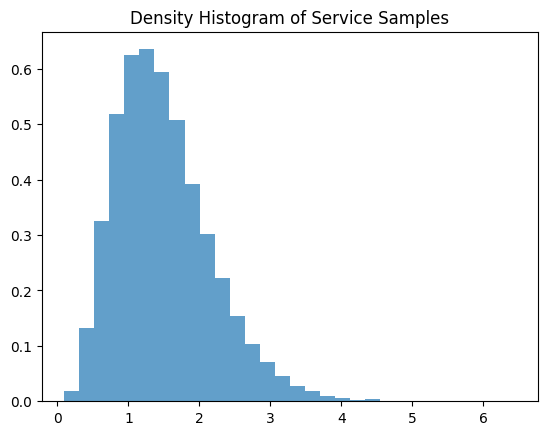

In [9]:
import matplotlib.pyplot as plt

# שימוש ב-hist במקום ב-plot
plt.hist(service_samples_station_2, density=True, bins=30, alpha=0.7)
plt.title("Density Histogram of Service Samples")
plt.show()